**Yixuan Qiu**

Spring 2020

CS 251B: Data Analysis and Visualization

Project 3: Linear regression

QR-based linear regression and polynomial regression

In [30]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

- In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:
    - `np.linalg.inv`
    - `scipy.linalg.lstsq` (in `LinearRegression::linear_regression_scipy` only).
    - `np.linalg.norm`
    - (LA section only): `scipy.linalg.solve_triangular`, 

## Task 4: Implement a QR based linear regression solver

### 4a) QR-decomposition

- Write algorithm to compute QR decomposition (`linear_regression::qr_decomposition`). **Run test code below.** Equation for R: $$R = Q^TA$$
- Implement `linear_regression::linear_regression_qr` to use the QR decomposition to do the linear regression. Recall that the equation is $$Rc = Q^Ty$$ which can be solved without taking the inverse of $R$ through backsolving.

#### Test QR decomposition

In [2]:
iris_filename = 'data/iris.csv'
iris_data = data.Data(iris_filename)

A = iris_data.select_data(['sepal_length', 'petal_width'])
A1 = np.hstack([A, np.ones([len(A), 1])])

lin_reg_qr = linear_regression.LinearRegression(iris_data)
myQ, myR = lin_reg_qr.qr_decomposition(A1)

Q, R = np.linalg.qr(A1)

print('NOTE: It is ok if everything is GLOBALLY negated.\n')
print(f'Your Q shape is {myQ.shape} and should be {Q.shape}')
print(f'Your R shape is {myR.shape} and should be {R.shape}')
print(f'1st few rows of your Q are\n{myQ[:3]} and should be\n{Q[:3]}')
print(f'\nYour R is\n{myR[:5]} and should be\n{R[:5]}')

NOTE: It is ok if everything is GLOBALLY negated.

Your Q shape is (150, 3) and should be (150, 3)
Your R shape is (3, 3) and should be (3, 3)
1st few rows of your Q are
[[ 0.07056 -0.11765  0.00009]
 [ 0.0678  -0.11202  0.0339 ]
 [ 0.06503 -0.10638  0.06772]] and should be
[[-0.07056 -0.11765 -0.00009]
 [-0.0678  -0.11202 -0.0339 ]
 [-0.06503 -0.10638 -0.06772]]

Your R is
[[72.27621 15.60873 12.12709]
 [-0.       7.66143 -1.22542]
 [-0.       0.       1.19668]] and should be
[[-72.27621 -15.60873 -12.12709]
 [  0.        7.66143  -1.22542]
 [  0.        0.       -1.19668]]


#### Test linear regression via QR decomposition

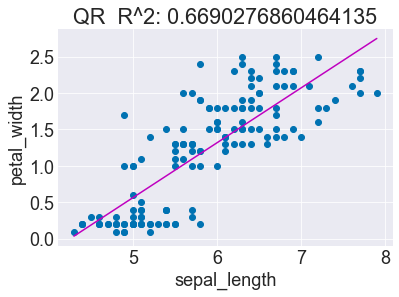

In [3]:
lin_reg_qr.linear_regression(['sepal_length'], 'petal_width', 'qr')
lin_reg_qr.scatter('sepal_length', 'petal_width', 'QR')
lin_reg_qr.show()

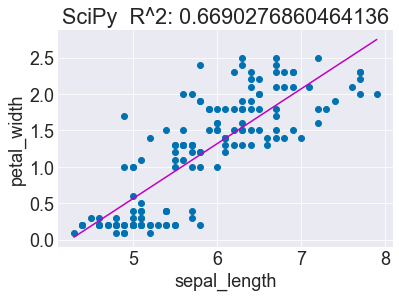

In [4]:
lin_reg_qr.linear_regression(['sepal_length'], 'petal_width', 'scipy')
lin_reg_qr.scatter('sepal_length', 'petal_width', 'SciPy')
lin_reg_qr.show()

**Question 4:** How do your results compare to the built-in SciPy solver? Is this what you expected? Why or why not?

**Answer 4:**My results using QR decomposition are almost the same as the built-in SciPy solver, which is what I expected. The r-squared value of SciPy is slightly higher than that of QR, which suggests SciPy does a slightly better job than QR.

### Task 4b) Compare performance of the linear regression methods

- Implement `mean_sse` in `linear_regression.py`. **Run test code below**
- In the cell below, load in the brain network `brain.csv` dataset.
- Create `Data` and `LinearRegression` objects.
- Load in the list of variable names in the brain dataset (62)
- Do multiple linear regressions, separately for each of the linear regression methods that you have implemented (including `scipy`): Set all brain data variables except for the last one as the independent variables, the last variable is the depenendent variable.
- Compute the mean sum of squares error (MSSE) in the predictions made by each linear regression model and the actual y values.

**Equation for MSSE:** $$E = \frac{1}{N}\sum_{i=1}^N \left (y_i - \hat{y}_i \right )^2$$

#### Test Mean SSE

In [5]:
# Test with iris data
lin_reg_norm = linear_regression.LinearRegression(iris_data)
lin_reg_norm.linear_regression(['sepal_length'], 'petal_width', 'normal')
print(f'Your Iris mean SSE is {lin_reg_norm.mean_sse():.2f} and should be 0.19')

# Test with passing in random data
np.random.seed(0)
test_data = np.random.rand(iris_data.get_num_samples(), 1)
print(f'Your random data mean SSE is {lin_reg_norm.mean_sse(X=test_data):.2f} and should be 16.72')

Your Iris mean SSE is 0.19 and should be 0.19
Your random data mean SSE is 16.72 and should be 16.72


In [6]:
brain_data = data.Data('data/brain.csv')
lin_reg_br = linear_regression.LinearRegression(brain_data)
# scipy
lin_reg_br.linear_regression(brain_data.get_headers()[:-1], brain_data.get_headers()[-1], method='scipy')
print("scipy msse:", lin_reg_br.mean_sse())

# normal
lin_reg_br.linear_regression(brain_data.get_headers()[:-1], brain_data.get_headers()[-1], method='normal')
print("normal msse:", lin_reg_br.mean_sse())

# qr
lin_reg_br.linear_regression(brain_data.get_headers()[:-1], brain_data.get_headers()[-1], method='qr')
print("qr msse:", lin_reg_br.mean_sse())

scipy msse: 5.334472355486481e-26
normal msse: 8585.477186895096
qr msse: 3.3020364993816476e-23


**Question 5:** What are the mean sum of squares errors for each of the regression methods on the brain data? Which method(s) do best and which do the worst **and why**?

**Answer 5:**<br >SciPy: 5.33x10^-26<br >
Normal: 8585 <br >
QR: 3.3x10^-23<br >
SciPy does the best, followed by QR, because the mean sum of sqaures are very small. Normal does the worst because the mean sum of squares is very large.

## Task 5: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a single linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$ 

### 5a) Implement polynomial regression

- Implement two methods: `LinearRegression::poly_regression` and `LinearRegression::make_polynomial_matrix` (*helper method*). To implement polynomial regression, recall that you add one or more "independent variables" to $A$, derived from the original column vector $x_1$. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).
- Add support for plotting polynomials in `LinearRegression::scatter`. To do this, you are going to generalize the regression line to a regression polynomial (if `self.p > 1`).
    - Getting your polynomial "x" values: Duplicate your line sample points for $p$ columns then raise each column to the appropriate power.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.
- Update `predict` to run `make_polynomial_matrix` on `X` to change it if `X` is not `None` and `self.p > 1`.

#### Test `make_polynomial_matrix`

In [7]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 5b) Fitting data with polynomial regression

- In the cell below, load in `poly_data_1.csv`, make a `Data` object, make a `LinearRegression` object based off it like usual.

In [8]:
poly_data_1 = data.Data('data/poly_data_1.csv')
lin_reg_p1 = linear_regression.LinearRegression(poly_data_1)

#### (i) Run polynomial regression on `poly_data_1` and plot results with `p=1`

- Run `poly_regression` with the polynomial degree $p = 1$. Solve using the normal equations.
- Use `scatter` to plot the results below.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

msse: 59.599210975703954


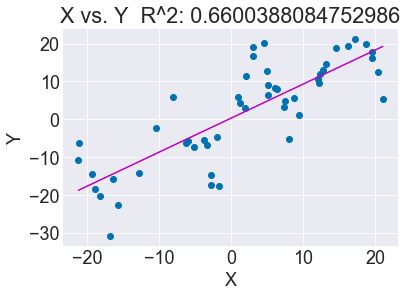

In [9]:
lin_reg_p1.poly_regression('X', 'Y', 1, method='normal')
lin_reg_p1.scatter('X', 'Y', 'X vs. Y', ind_var_index=0)
print("msse:", lin_reg_p1.mean_sse())

#### (ii) Higher degree polynomials

In the cell below,
- Run `poly_regression` on the same datset with `p = 5`.
- Plot the results.
- Print out the mean squared error.

msse: 49.80778219474408


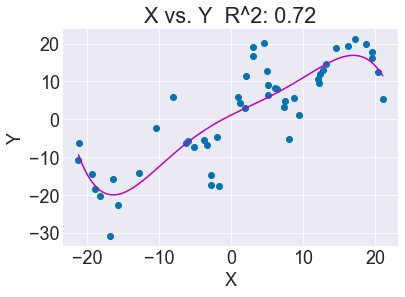

In [10]:
lin_reg_p1.poly_regression('X', 'Y', 5, method='normal')
lin_reg_p1.scatter('X', 'Y', 'X vs. Y', ind_var_index=0)
print("msse:", lin_reg_p1.mean_sse())

**Question 6:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 7:** Describe what happens as you experiment with the polynomial degree between 1 and 5.

**Answer 6:**Better, because the msse gets smaller, the R2 value gets larger, and the curve passes through more points.

**Answer 7:**MSSE decreases as the polynomial degree increases. The model fits better with an increasing polynomial degree.

#### (iii) Check overfitting

Now you will check to see how the $p=5$ polynomial regression model generalizes to new data. 

- Load in `poly_data_2.csv`, which is the 2nd half of the `poly_data_1` dataset, make a new `Data` object, etc.
- Run `scatter` to show a scatterplot and the polynomial regression of the `poly_data_2` data, but use the polynomial regression model fit to the `poly_data_1`. Do this by replacing the `Data` object in `LinearRegression` object with the one holding `poly_data_2`. Use `set_data()`; do NOT run `poly_regression` again. You want to use the same fitted slopes/intercept from `poly_data_1`.
- Print out the mean sum of squared error obtained when predicting the `poly_data_2` using the regression model fit on `poly_data_1`. Do this by passing in the data column `X` selected from `poly_data_2` as a column vector ndarray.

MSSE: 394.191912618505


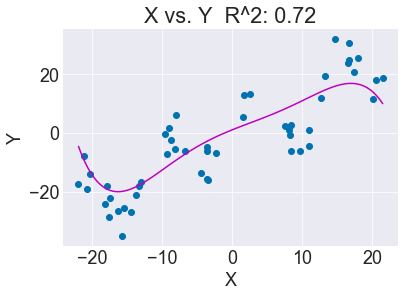

In [11]:
poly_data_2 = data.Data('data/poly_data_2.csv')
lin_reg_p1.set_data(poly_data_2)
lin_reg_p1.scatter('X', 'Y', 'X vs. Y', ind_var_index=0)
col = poly_data_2.select_data('X')
msse = lin_reg_p1.mean_sse(col)
print("MSSE:", msse)

**Question 8:** Describe how the fitted coefficients obtained for `poly_data_1` do on `poly_data_2`. Do they do a good or bad job? Why?

**Answer 8:**The coefficients do not fit poly_data_2 very well because MSSE is much higher than that of poly_data_1.

#### (iv) Even higher degree polynomials

In the cell below, experiment with fitting and plotting `poly_data_1` again, but this time with an even higher degree polynomial `p=19`.

Be sure to:
- Fit the higher degree polynomial to the `poly_data_1` data.
- Plot the results for both `poly_data_1` and `poly_data_2`.
- Print out the MSSE for both `poly_data_1` and `poly_data_2`
- Like you did with `p = 5`, experiment how the results transfer to `poly_data_2` (i.e. do NOT re-run `poly_regression` after fitting coefficients to `poly_data_1`.

**Question 9:** What's going on with the higher degree polynomial fit and $R^2$?

**Question 10:** Compare the results for `poly_data_1` and `poly_data_2`. Back up your observations with numbers (e.g. MSSE).

**Answer 9:**With a higher degree polynomial, the msse gets much smaller for poly_data_1, the R2 gets larger, which means the model fits better.

**Answer 10:**When p is high, the model fits poly_data_1 better than when p is low, because the MSSE decreases and R2 increases as p increases. But the model is overfitting for poly_data_2, because the MSSE for poly_data_2 is 538 when p=19, compared to 394 when p=5.

MSSE for poly_data_1: 11.52155621558155


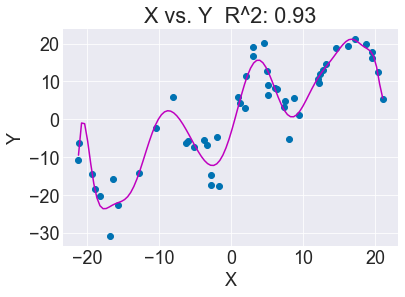

In [12]:
poly_data_1 = data.Data('data/poly_data_1.csv')
lin_reg_p1 = linear_regression.LinearRegression(poly_data_1)
lin_reg_p1.poly_regression('X', 'Y', 19, method='normal')
lin_reg_p1.scatter('X', 'Y', 'X vs. Y', ind_var_index=0)
print("MSSE for poly_data_1:", lin_reg_p1.mean_sse())

MSSE for poly_data_2: 538.4738006067874


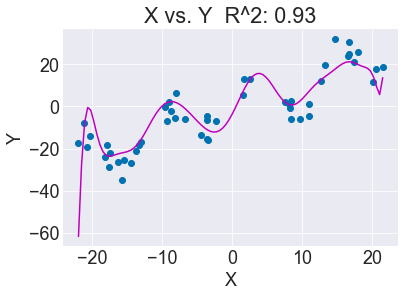

In [13]:
poly_data_2 = data.Data('data/poly_data_2.csv')
lin_reg_p1.set_data(poly_data_2)
lin_reg_p1.scatter('X', 'Y', 'X vs. Y', ind_var_index=0)
col = poly_data_2.select_data('X')
msse = lin_reg_p1.mean_sse(col)
print("MSSE for poly_data_2:", msse)

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

#### Analyzing the relationship between total bills and tips

In [14]:
tips_data = data.Data('data/tips.csv')
lin_reg_tip = linear_regression.LinearRegression(tips_data)

# choose the best polynomial degree
for i in range(1, 20):
    print("p =", i)
    lin_reg_tip.poly_regression('total_bill', 'tip', i, method='qr')
    print("MSSE:", lin_reg_tip.mean_sse())
    print("R2:", lin_reg_tip.R2)

p = 1
MSSE: 1.036019442011377
R2: 0.45661658635167657
p = 2
MSSE: 1.0359808309666803
R2: 0.4566368375172638
p = 3
MSSE: 1.0050249385127352
R2: 0.4728729406559251
p = 4
MSSE: 0.9453978599583202
R2: 0.5041468378212826
p = 5
MSSE: 0.9281908690446474
R2: 0.5131717586694229
p = 6
MSSE: 0.9194165437871685
R2: 0.5177738178755833
p = 7
MSSE: 0.908643071970656
R2: 0.5234244125025868
p = 8
MSSE: 0.9017881063148657
R2: 0.5270197838705735
p = 9
MSSE: 0.8962753625218415
R2: 0.5299111712513029
p = 10
MSSE: 0.9058098991986077
R2: 0.5249103876010291
p = 11
MSSE: 0.900934026966294
R2: 0.527467741247756
p = 12
MSSE: 0.9000461489268079
R2: 0.5279334257517674
p = 13
MSSE: 0.8996627133095928
R2: 0.5281345344821134
p = 14
MSSE: 0.8994434207010068
R2: 0.5282495515960877
p = 15
MSSE: 0.899298894914439
R2: 0.5283253541458091
p = 16
MSSE: 0.8991951269966598
R2: 0.5283797795389085
p = 17
MSSE: 0.8991161966855425
R2: 0.5284211778178943
p = 18
MSSE: 0.8990535720321645
R2: 0.5284540239176403
p = 19
MSSE: 0.89900221

#### When the polynomial degree is 9, the mean sum of squares is the smallest and the R squared value is the highest.

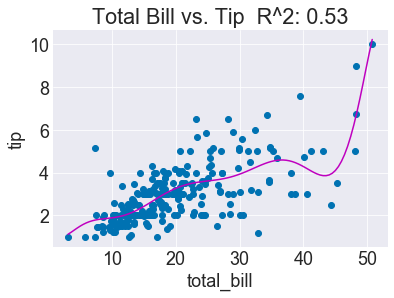

In [15]:
# plot the best p=9
lin_reg_tip.poly_regression('total_bill', 'tip', 9, method='qr')
lin_reg_tip.scatter('total_bill', 'tip', 'Total Bill vs. Tip', ind_var_index=0)
lin_reg_tip.show()

##### Analysis:  <br>
Overall, tip is positively correlated to total bill. It makes sense because the tip percentage is predictable, usually between 15% to 20%, indicated by the slope of tagent lines on the curve. Based on the graph, tip increases faster when total bill is high, because there are not many samples with a large amount of total bill. The upper bound is around $50. Most of data samples cluster at small amount of total bill, where the curve fits better.
Additionally, tipping expectations are tied to wage levels, which suggests that the more people spend, the more tip they are willing to give.


#### Exploring relationship between size and tips

In [16]:
# choose the best polynomial degree
for i in range(1, 10):
    print("p =", i)
    lin_reg_tip.poly_regression('size', 'tip', i, method='qr')
    print("MSSE:", lin_reg_tip.mean_sse())
    print("R2:", lin_reg_tip.R2)

p = 1
MSSE: 1.4501410930286225
R2: 0.2394132914419278
p = 2
MSSE: 1.441355642999258
R2: 0.244021185496623
p = 3
MSSE: 1.4401609941486162
R2: 0.24464776869018978
p = 4
MSSE: 1.4385820163208125
R2: 0.24547592917382044
p = 5
MSSE: 1.4326728041078678
R2: 0.24857526087941884
p = 6
MSSE: 1.4326728041078678
R2: 0.24857526087941884
p = 7
MSSE: 1.4326728041078678
R2: 0.24857526087941884
p = 8
MSSE: 1.4326728041078678
R2: 0.24857526087941884
p = 9
MSSE: 1.4326728041078676
R2: 0.24857526087941895


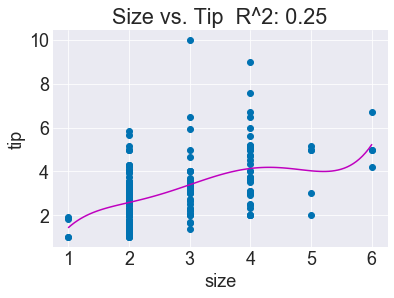

In [17]:
# plot the best fit when p = 5
lin_reg_tip.poly_regression('size', 'tip', 5, method='qr')
lin_reg_tip.scatter('size', 'tip', 'Size vs. Tip', ind_var_index=0)

##### Analysis:<br>
Although the curve fits the data poorly--the r-squared is low, it is easier to identify the trend in such a discrete graph. Generally, tip is positively correlated to size, which makes sense because a larger group of people tends to spend more.

#### Splitting Female and Male

I decided to further explore the relationship/difference between female and male customers regarding total bills and tips.

Firstly, I used a dictionary to store 'female' and 'male' as keys that correspond to int values 0 and 1 respectively. Then I created an int array that mapped the string values of the 'sex' column to ints(either 0 or 1), so that I could divide the data samples into two based on sexes(female and male).

I accessed 2 separate data to get the column that I wanted to plot with a certain sex.

In [18]:
sex_arr = tips_data.select_data('sex', getTypeStr = True)
sex_list = np.squeeze(sex_arr)

total_bill_arr = tips_data.select_data('total_bill')
float_arr = total_bill_arr.astype('float64')
sex_bill = np.concatenate((sex_arr, float_arr), axis = 1)
# print('2D array [sex, total bill]:\n\n', sex_bill)

tip_arr = tips_data.select_data('tip')
tip_farr = tip_arr.astype('float64')

# 0=female, 1=male
# convert string array 'sex' to an int aray(0 or 1)
dict = {'Female': 0, 'Male': 1}
x = [dict[sex] for sex in sex_list]

female_list = []
male_list = []

for i in range(len(x)):
    if x[i] == 0:
        female_list.append(i)
    else:
        male_list.append(i)

# total bill data for female    
y_f = [float_arr[i] for i in female_list]
y_0 = np.squeeze(y_f)

# tip for female
t_f = [tip_farr[i] for i in female_list]
t_0 = np.squeeze(t_f)

# total bill data for male 
y_m = [float_arr[i] for i in male_list]
y_1 = np.squeeze(y_m)

# tip for male
t_m = [tip_farr[i] for i in male_list]
t_1 = np.squeeze(t_m)

I used NumPy's concatenate function to build 2d arrays with 2 variables(total bill and tip) for female and male respectively.
Then I created data objects by passing the 2d arrays as arguments.

In [19]:
# Female
# Total Bill vs. Tip
total_bill_f = np.reshape(y_0, (len(y_0), 1))
tip_f = np.reshape(t_0, (len(t_0), 1))
bill_tip_f = np.concatenate((total_bill_f, tip_f), axis = 1)
btf_h2c = {}
btf_h2c['total_bill'] = 0
btf_h2c['tip'] = 1
btf_data = data.Data(headers=['total_bill', 'tip'], data=bill_tip_f, header2col=btf_h2c)
lin_reg_btf = linear_regression.LinearRegression(btf_data)
lin_reg_btf.linear_regression('total_bill', 'tip', 'qr')

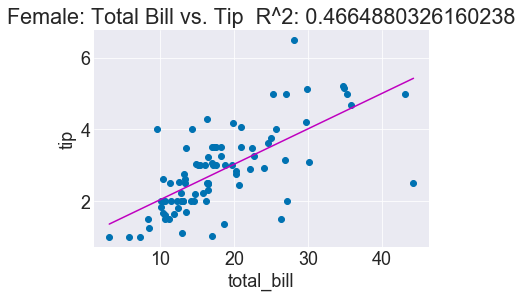

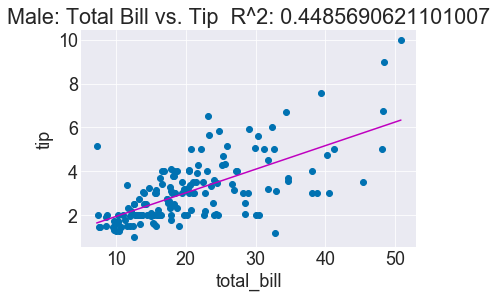

In [20]:
# Male
# Total Bill vs. Tip
total_bill_m = np.reshape(y_1, (len(y_1), 1))
tip_m = np.reshape(t_1, (len(t_1), 1))
bill_tip_m = np.concatenate((total_bill_m, tip_m), axis = 1)
btm_h2c = {}
btm_h2c['total_bill'] = 0
btm_h2c['tip'] = 1
btm_data = data.Data(headers=['total_bill', 'tip'], data=bill_tip_m, header2col=btm_h2c)
lin_reg_btm = linear_regression.LinearRegression(btm_data)
lin_reg_btm.linear_regression('total_bill', 'tip', 'qr')

lin_reg_btf.scatter('total_bill', 'tip', 'Female: Total Bill vs. Tip')
lin_reg_btm.scatter('total_bill', 'tip', 'Male: Total Bill vs. Tip')

Analysis:<br>
The models for female and male are similar, indicating positive correlations between tip and total bill.<br>
Comparing the ranges of the x-axes, females generally eat/pay less than males.<br>
The data points representing males are denser than that representing females, which shows that the number of males is larger than that of females in the dataset, suggesting that males pay the bill more often than females, at least in the provided data samples. <br>
Despite the different total bills and tips for females and males, the tip percentages are about the same since the two slopes are similar.<br>

#### Increasing the polynomial degree to see the trends

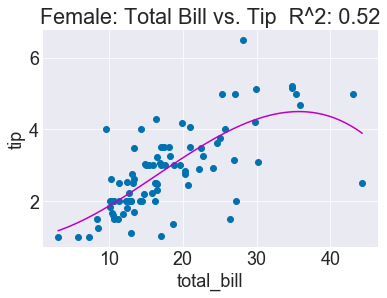

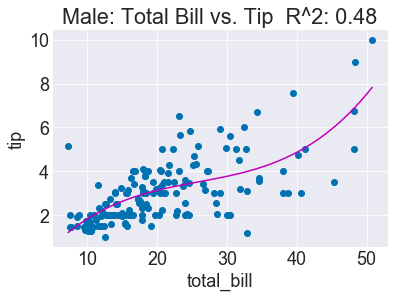

In [21]:
# p = 3
lin_reg_btf.poly_regression('total_bill', 'tip', 3, method='qr')
lin_reg_btf.scatter('total_bill', 'tip', 'Female: Total Bill vs. Tip', ind_var_index=0)

lin_reg_btm.poly_regression('total_bill', 'tip', 3, method='qr')
lin_reg_btm.scatter('total_bill', 'tip', 'Male: Total Bill vs. Tip', ind_var_index=0)

Analysis:<br>
With a higher polynomial degree, the R-squared values for both sexes get larger and so the models fit better.<br>
Tips increase as total bills increase, but trends for female and male are different.<br>
For female, the curve flattens out as total bill gets higher. Whereas for male, the slope gets shaper as total bill increases.

### 2. Linear regression algorithm comparison

- Compare the linear regression methods that you implemented on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

Poorly conditioned matrix is a matrix with a high condition number.
Firstly, I compared the condition number of several datasets and found a relatively poor one--wine.csv.

In [22]:
wine_mat = data.Data('data/wine.csv').get_all_data()
print("condition number:", np.linalg.cond(wine_mat))

condition number: 8969.828411671746


In [23]:
wine_data = data.Data('data/brain.csv')
lin_reg_w = linear_regression.LinearRegression(wine_data)
# scipy
lin_reg_w.linear_regression(wine_data.get_headers()[:-1], wine_data.get_headers()[-1], method='scipy')
print(f"SciPy MSSE: {lin_reg_w.mean_sse()}")

# normal
lin_reg_w.linear_regression(wine_data.get_headers()[:-1], wine_data.get_headers()[-1], method='normal')
print(f"Normal MSSE: {lin_reg_w.mean_sse()}")

# qr
lin_reg_w.linear_regression(wine_data.get_headers()[:-1], wine_data.get_headers()[-1], method='qr')
print(f"QR MSSE: {lin_reg_w.mean_sse()}")

SciPy MSSE: 5.334472355486481e-26
Normal MSSE: 8585.477186895096
QR MSSE: 3.3020364993816476e-23


SciPy does the best as the MEES is the lowest.

Normal equation: (A.T@A)@C=A.T@y<br>
log10(cond(A.T@A)) is the number of digits of accuracy lost in calculation.<br>
Forming normal equations will double the number of digits of accuracy lost.<br>
Using normal equations will square the condition number and double the number of digits of accuracy, while using a more stable method such as QR will not. The larger the condition number, the more it will affect the accuracy.<br>

The condition number of the wine data is about 10^4. Using QR will give about 4 digits of accuracy and using normal equstions will double the digits of accuracy--8.

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

poly_data_1:<br>

##### Number of Samples - 1 = 50 -1 = 49<br>
##### Confidence Interval = 95% <br>
##### Significance Level: 0.05<br>

Using the Critical Values for t-Interval Table in the link below to find degree of freedom:
https://www.coconino.edu/resources/files/pdfs/academics/sabbatical-reports/kate-kozak/appendix_table.pdf

##### Degree of Freedom = 2.010 <br>

Calculate critical value with Significance Level and Degree of Freedom using a calculator:
https://www.socscistatistics.com/tests/criticalvalues/default.aspx

##### Critical Value (1-tailed) = 2.92<br>

Calculate the standard error of the slope (SE) using the following formula:

##### SE = sqrt [ Σ(yi - ŷi)2 / (n - 2) ] / sqrt [ Σ(xi - x)2 ]

where yi is the value of the dependent variable for observation i, ŷi is estimated value of the dependent variable for observation i, xi is the observed value of the independent variable for observation i, x is the mean of the independent variable, and n is the number of observations.

In [24]:
# Compute standard error (SE)
poly_data_1 = data.Data('data/poly_data_1.csv')
lin_reg_p1 = linear_regression.LinearRegression(poly_data_1)
lin_reg_p1.linear_regression('X', 'Y', method='scipy')
estimated_y = lin_reg_p1.predict(lin_reg_p1.slope, lin_reg_p1.intercept)
y_sum = np.sum((lin_reg_p1.y - estimated_y)**2)
x_vals = poly_data_1.select_data('X')
x_mean = np.mean(x_vals)
x_sum = np.sum((x_vals - x_mean)**2)
n = poly_data_1.get_num_samples()
SE = math.sqrt(y_sum / x_sum / (n-2))
print("SE:", SE)

SE: 0.09305242606719503


##### ME = critical value * standard error

In [25]:
# Compute margin of error (ME)
ME = 2.92 * SE
print("ME:", ME)

ME: 0.2717130841162095


In [26]:
slope = lin_reg_p1.slope
print("Slope:", slope)

Slope: [[0.89829]]


In [27]:
print("Lower Bound:", slope - ME)
print("Upper Bound:", slope + ME)

Lower Bound: [[0.62658]]
Upper Bound: [[1.17001]]


The range of the confidence interval is defined by the sample statistic +- margin of error.
The slope is 0.898, so the 95% confidence interval for this sample is 0.898 +- 0.272, which is 0.627 to 1.170.

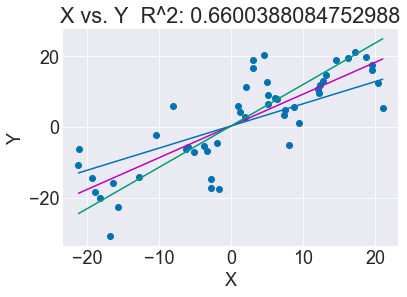

In [28]:
lin_reg_p1.scatter('X', 'Y', 'X vs. Y')
x_line = np.linspace(np.amin(x_vals), np.amax(x_vals), 100)
y_line1 = 0.62658 * x_line + lin_reg_p1.intercept
plt.plot(x_line, y_line1)
y_line2 = 1.17001 * x_line + lin_reg_p1.intercept
plt.plot(x_line, y_line2)
lin_reg_p1.show()

The region enveloping the three lines is the 95% confidence interval.

I also created a scatter_ci method in linear_regression that an 95% confidence interval.

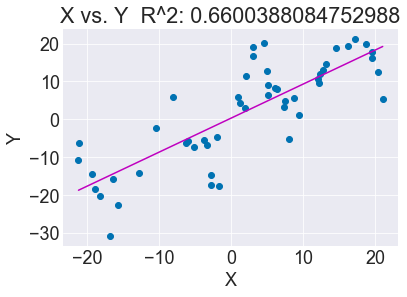

In [36]:
# test scatter_ci
lin_reg_p1.scatter_ci('X', 'Y', 'X vs. Y')

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?